# 🧠🤖 Treinamento de Redes Convolucionais

- **Deadline**: 27/07/2025
- **Entrega**: O trabalho deve ser entregue via sistema Testr.
- **Pontuação**: 5 pontos (+1 ponto extra).
- O trabalho deve ser realizado individualmente.



Aluno: Hygo Freire Tagarro


### Contexto

O trabalho consiste em realizar o treinamento de redes neurais convolucionais na base de dados [Chest X-ray Image (COVID19, PNEUMONIA, and NORMAL) disponível no kaggle](https://www.kaggle.com/datasets/alsaniipe/chest-x-ray-image). Esta base de dados contém exames de raio-x de pacientes saudáveis, com pneumonia e com covid19. O objetivo do trabalho é treinar uma rede neural capaz de identificar se o raio-x pertence a uma pessoa saudável ou com uma das duas doenças.




### Regras

- Devem ser treinadas 3 redes neurais, uma customizada (desenvolvida pelo aluno), uma pré-treinada com parte convolucional congelada e uma pré-treinada  treinada totalmente (*fine-tuning*).
- O dataset provê conjuntos de treino e teste. O conjunto de treino deve ser dividido em
- O código deve ser preparado para utilizar GPUs (no colab ou localmente).
- Não devem ser utilizados frameworks de alto nível como keras ou lightning. O código deve utilizar apenas pytorch.
- Deve ser utilizado data augmentation (o aluno tem liberdade para escolher os métodos que fizerem sentido para a tarefa).
- Ao final, deve ser apresentados gráficos comparando as acurácias de treino e validação ao longo das épocas e uma tabela apresentando as métricas de performance revocação, f1-score e acurácia para o conjunto de teste em cada configuração de rede neural. Além disso, deve ser uma análise qualitativa dos casos de falha.
- Por fim, deve ser escrito um texto curto descrevendo e discutindo os resultados. Deve ser explicado com as suas palavras o que as métricas indicam (e.g., o que quer dizer um recall alto para pneumonia, se isto acontecer), se aconteceu overfitting ou se o modelo alcançou uma boa generalização, se os valores das métricas foram satisfatórios, prováveis causas para as falhas e sugestões de como melhorar a performance.



### Pontos Extras

- Receberá um ponto extra, o aluno que utilizar um método explainability (e.g., [gradcam++](https://github.com/jacobgil/pytorch-grad-cam)) para mostrar as regiões que mais influenciaram a decisão da rede neural.


### Dicas de Implementação

- **Download dos dados**: use a biblioteca `kagglehub` para fazer o download do dataset no colab.

- **Criação do dataset**: o pytorch possui a função [ImageFolder](https://debuggercafe.com/pytorch-imagefolder-for-training-cnn-models/) que torna mais simples a criação de datasets organizados no formato do dataset utilizado no trabalho.

- **Leitura e preprocessamento das Imagens**: As imagens do dataset possuem características bastante diversas, com algumas delas sendo armazenadas em tons de cinza e outras em RGB, algumas são arquivos BITMAP armazenados em formato jpg, algumas usam 8 bits e outras 16 bits para representar pixels e as resoluções das imagens são altamente diferentes. Use a função abaixo para ler as imagens e lembre-se de realizar *resize* para o tamanho esperado pela rede neural.

```python
from PIL import Image

def load_img(path):
  # Le a imagem em diversos formatos e garante que a imagem tenha 3 canais
  img = Image.open(path).convert('RGB')
  # converte para um tensor do pytorch
  img = v2.functional.to_image(img)
  # garante que seja uma imagem de 8 bits reescalando os valores adequadamente
  img = v2.functional.to_dtype(img, dtype=torch.uint8, scale=True)
  return img
```

- **Aumento de Dados**: Para visualizar a maioria das transformações disponíveis, veja [este site](https://docs.pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html). Use a versão `v2` do pacote `pytorch.transforms`. Veja [este link](https://docs.pytorch.org/vision/main/transforms.html#v2-api-reference-recommended) para uma explicação do porquê e instruções de uso.
  - ⚠️**IMPORTANTE**⚠️: o aumento de dados deve ser aplicado apenas no conjunto de treinamento para aumentar a diversidade dos dados. Os dados de validação e teste devem ser **puros e não modificados**, exceto por operações como resize ou normalização.


- **Seleção de um modelo pré-treinado**: É uma boa idéia experimentar com diferentes modelos pré-treinados para avaliar qual vai levar a predições mais corretas e avaliar outros critérios, por exemplo, tempo de forward por imagem. Uma heurística para escolher modelos é buscar aqueles que possuem [melhor performance na base de dados ImageNet](https://docs.pytorch.org/vision/0.21/models.html#table-of-all-available-classification-weights:~:text=Table%20of%20all%20available%20classification%20weights).
  - As redes mobilenet-v2 e -v3 são desenhadas para serem rápidas e rodarem em dispositivos de baixo poder computacional.
  - A rede densenet em geral entrega boa performance.
  - As Efficientnet-b5+ não rodam no colab (até a última vez que testei) por falta de memória.
  - As redes ViT usam a arquitetura transformers e não são convolucionais. **Elas podem ser utilizadas para comparação, mas pelo menos uma outra rede neural totalmente convolucional deve ser utilizada**.

- **Visualize sempre que possível**: Não deixe de visualizar pelo menos uma vez os batches que estão sendo usados para treinar a rede. Alguma operação pode estar transformando as imagens de forma que a impedir que a rede neural seja capaz de aprender os padrões que ela deveria aprender.

- **Brinque com Hiperparâmetros**: Ajuste os hiperparâmetros para tentar chegar em modelos com o máximo de performance de validação. Não é obrigatório, mas é legal brincar também com técnicas de regularização, caso a rede esteja sofrendo de overfitting.

- **Desbalanceamento do Dataset**: O dataset possui algum nível de desbalanceamento, com mais imagens normais do que com covid ou pneumonia. Não é obrigatório, mas quem quiser pode realizar superamostragem dos dados com covid ou pneumonia para mitigar o desbalanceamento. As operações de data augmentation vão garantir que os dados tenham diversidade.


- **Escrita de tabelas**: Tabelas podem ser escritas em notebooks usando latex, como indicado abaixo.

```latex
\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}
```

O resultado seria:

\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}

Elas também pode ser escritas em markdown como indicado abaixo:

```markdown
| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |
```

O resultado seria:

| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |


### Roteiro de Implementação

Para realizar o trabalho, siga os seguintes passos:

1. Faça o download automático do dataset.
1. Compreenda a organização do dataset e visualize alguns dados.
1. Crie os dataset de treino, validação e teste do pytorch. Visualize se os dados continuam com a mesma cara.
1. Crie as transformações de data augmentation e adicione ao dataset de treino.
1. Crie transformações para os datasets de validação e teste que coloquem os dados no mesmo formato usado no treino, por exemplo, resize e normalização. Lembre-se de **NÃO** aplicar data augmentation nos conjuntos de validação e teste!
1. Crie dataloaders.
1. Construa uma CNN.
1. Escreva funções para treinamento e avaliação. Retorne o valor da acurácia para os conjuntos de treino e validação nas épocas de treinamento.
1. Crie uma loss function e um otimizador.
1. Execute o treinamento e verifique se a curva de treinamento está se comportando como esperado.
  - A acurácia de treinamento está aumentando? Se não, verifique se o dataset está certo e aumente a capacidade da rede.
  - A acurácia de treinamento se aproximando de 100%? Se não, aumente a capacidade da rede e tente ajustar a learning rate.
  - A acurácia de validação está aumentando no início do treinamento? Se não, verifique se os dados de validação estão no mesmo formato dos dados de treinamento.
  - A acurácia de validação está diminuindo depois de um número de épocas? Parece que está acontecendo overfitting. Tente usar algum método de regularização.
1. Brinque com os hiperparâmetros para tentar fazer a rede aprender mais rápido e com maior performance de validação.
1. Crie uma função para calcular métricas de avaliação e visualize as métricas para os conjuntos de treinamento e teste. Compare os dois e veja se aconteceu overiffitting.

Repita o processo usando as redes pré-treinadas.



# 1. Imports e declaração das classes compartilhadas

In [1]:
import os
import time
from enum import Enum

import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from torch import nn
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, models
from torchvision.transforms import v2
from tqdm import tqdm

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)

if torch.cuda.is_available():
    print("cuda:", torch.cuda.get_device_name(0))
    print("pytorch:", torch.__version__)
else:
    print("cpu.")

cuda: NVIDIA GeForce RTX 4090
pytorch: 2.7.1+cu118


### 1.1 - Enum com os tipos de dados

In [3]:
class ClassDataType(Enum):
    COVID19 = 'COVID19'
    NORMAL = 'NORMAL'
    PNEUMONIA = 'PNEUMONIA'

### 1.2 - Classe de configuração do modelo

In [4]:
class Config:
    NUM_EPOCHS = 220
    BATCH_SIZE = 64
    LEARNING_RATE = 1e-3
    PATIENCE = 10

    IMG_SIZE = 224
    TRAIN_SPLIT_RATIO = 0.8

    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
    NUM_WORKERS = os.cpu_count() // 2 if os.cpu_count() else 4

    MODEL_SAVE_DIR = "models"
    REPORTS_DIR = "reports"
    TENSORBOARD_DIR = "runs"

    def __init__(self, batch_size: int = BATCH_SIZE, learning_rate: float = LEARNING_RATE, patience: int = PATIENCE):

        dataset_dir = kagglehub.dataset_download("alsaniipe/chest-x-ray-image")

        self.processed_data_dir = f"./processed"
        self.base_dir = f"{dataset_dir}/Data"

        self.train_dir = os.path.join(self.base_dir, 'train')
        self.test_dir = os.path.join(self.base_dir, 'test')
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.patience = patience

    def qtd_images_train(self) -> tuple[int, int, int]:
        return self.qtd_images_dir(self.train_dir)

    def qtd_images_test(self) -> tuple[int, int, int]:
        return self.qtd_images_dir(self.test_dir)

    def class_weights_train(self) -> torch.Tensor:
        return self.class_weights(self.qtd_images_train)

    def class_weights_test(self) -> torch.Tensor:
        return self.class_weights(self.qtd_images_test)

    def class_weights(self, func) -> torch.Tensor:
        qtd_num_covid, qtd_num_normal, qtd_num_pneumonia = func()
        print(f"Covid: {qtd_num_covid}, Normal: {qtd_num_normal}, Pneumonia: {qtd_num_pneumonia}")

        weight_covid = 1.0 / qtd_num_covid
        weight_normal = 1.0 / qtd_num_normal
        weight_pneumonia = 1.0 / qtd_num_pneumonia

        total_weight = weight_covid + weight_normal + weight_pneumonia

        return torch.tensor([
            weight_covid / total_weight,
            weight_normal / total_weight,
            weight_pneumonia / total_weight
        ]).to(self.DEVICE)

    @staticmethod
    def qtd_images_dir(dataset_dir: str) -> tuple[int, int, int]:
        covid_path = os.path.join(dataset_dir, 'COVID19')
        normal_path = os.path.join(dataset_dir, 'NORMAL')
        pneumonia_path = os.path.join(dataset_dir, 'PNEUMONIA')

        qtd_num_covid = len(os.listdir(covid_path))
        qtd_num_normal = len(os.listdir(normal_path))
        qtd_num_pneumonia = len(os.listdir(pneumonia_path))

        return qtd_num_covid, qtd_num_normal, qtd_num_pneumonia

### 1.3 - Classe que faz o pré processamento dos dados

In [5]:
def load_img(path):
    img = Image.open(path).convert('RGB')
    img = v2.functional.to_image(img)
    img = v2.functional.to_dtype(img, dtype=torch.uint8, scale=True)
    return img

class Preprocessor:
    def __init__(self, config: Config):
        self.config = config
        self.img_size = config.IMG_SIZE
        self.source_base_dir = config.base_dir
        self.target_base_dir = config.processed_data_dir

    def run(self, padding: int = 32):

        resize_transform = v2.Resize((self.img_size + padding, self.img_size + padding))

        print(f"Iniciando pré-processamento de '{self.config.base_dir}' para '{self.config.processed_data_dir}'...")

        for split in ['train', 'val', 'test']:
            source_dir = os.path.join(self.source_base_dir, split)
            target_dir = os.path.join(self.target_base_dir, split)

            if not os.path.isdir(source_dir):
                continue

            all_paths = [
                os.path.join(dirpath, filename)
                for dirpath, _, filenames in os.walk(source_dir)
                for filename in filenames
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
            ]

            if not all_paths:
                continue

            for img_path in tqdm(all_paths, desc=f"running {split}"):
                relative_path = os.path.relpath(img_path, source_dir)
                target_img_path = os.path.join(target_dir, os.path.splitext(relative_path)[0] + '.png')

                if os.path.exists(target_img_path):
                    continue

                try:
                    os.makedirs(os.path.dirname(target_img_path), exist_ok=True)

                    img_tensor = load_img(img_path)
                    img_resized = resize_transform(img_tensor)

                    pil_img = v2.functional.to_pil_image(img_resized)
                    pil_img.save(target_img_path)

                except Exception as e:
                    print(f"Erro ao processar a imagem {img_path}: {e}")

        print("\nPré-processamento concluído!")

### 1.4 - Classe que faz a impressão de todos as figuras do trabalho

In [6]:
class ReportData:
    def __init__(self, config: Config):
        self.train_dir = config.train_dir
        self.test_dir = config.test_dir

    def print_data_organized(self) -> None:
        for dataset_type, dataset_dir in [('Treino', self.train_dir), ('Teste', self.test_dir)]:
            covid_path = os.path.join(dataset_dir, 'COVID19')
            normal_path = os.path.join(dataset_dir, 'NORMAL')
            pneumonia_path = os.path.join(dataset_dir, 'PNEUMONIA')

            qtd_num_covid = len(os.listdir(covid_path))
            qtd_num_normal = len(os.listdir(normal_path))
            qtd_num_pneumonia = len(os.listdir(pneumonia_path))

            print(f"Conjunto de {dataset_type}:")
            print(f"  - Imagens com Covid: {qtd_num_covid}")
            print(f"  - Imagens Normais: {qtd_num_normal}")
            print(f"  - Imagens com Pneumonia: {qtd_num_pneumonia}")
            print(f"  - Total: {qtd_num_covid + qtd_num_normal + qtd_num_pneumonia}\n")

    def plot_samples(self, category_type: ClassDataType, num_samples=5):
        image_path = os.path.join(self.train_dir, category_type.value)
        plt.figure(figsize=(12, 4))
        image_files = os.listdir(image_path)[:num_samples]

        for i, file_name in enumerate(image_files):
            img = Image.open(os.path.join(image_path, file_name))
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"{category_type.value} {i + 1}")
            plt.axis('off')
        plt.show()

    @staticmethod
    def print_grid(class_names: [str], data_loader: DataLoader) -> None:
        def imshow(grid_imgs, title=""):
            grid_imgs = grid_imgs.numpy().transpose((1, 2, 0))
            plt.imshow(grid_imgs, cmap='gray')
            plt.title(title, fontsize=12)
            plt.axis('off')

        imgs, labels = next(iter(data_loader))

        plt.figure(figsize=(24,12))
        imshow(
            grid_imgs=torchvision.utils.make_grid(imgs),
            title=f"Amostras: {[class_names[x] for x in labels][:5]}..."
        )
        plt.show()

    @staticmethod
    def print_normalized_images(class_names: [str], data_loader: DataLoader):
        imgs, labels = next(iter(data_loader))

        def imshow_normalized(grid_imgs, title=""):
            grid_imgs = grid_imgs.numpy().transpose((1, 2, 0))
            mean = np.array([0.5])
            std = np.array([0.5])
            grid_imgs = std * grid_imgs + mean
            grid_imgs = np.clip(grid_imgs, 0, 1)
            plt.imshow(grid_imgs, cmap='gray')
            plt.title(title, fontsize=10)
            plt.axis('off')

        num_images_to_show = 32
        images_to_show = imgs[:num_images_to_show]
        labels_to_show = labels[:num_images_to_show]

        plt.figure(figsize=(24,12))
        imshow_normalized(
            grid_imgs=torchvision.utils.make_grid(images_to_show, nrow=8),
            title=f"Amostras: {[class_names[x] for x in labels_to_show[:8]]}..."
        )
        plt.show()

    @staticmethod
    def print_history_data(history: list) -> None:
        history = np.array(history)

        plt.figure(figsize=(16, 6))

        plt.subplot(1, 2, 1)
        plt.title('Acurácia ao Longo das Épocas')
        plt.plot(history[:, 1], '-o', label='Acurácia de Treino')
        plt.plot(history[:, 3], '-o', label='Acurácia de Validação')
        plt.xlabel('Época')
        plt.ylabel('Acurácia')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.title('Loss ao Longo das Épocas')
        plt.plot(history[:, 0], '-o', label='Perda de Treino')
        plt.plot(history[:, 2], '-o', label='Perda de Validação')
        plt.xlabel('Época')
        plt.ylabel('Perda')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    @staticmethod
    def compare_mismatched_batch(class_names: [str], data_loader: DataLoader, model: nn.Module, device: str) -> None:
        model.eval()
        qtd_imgs_to_print: int = 30

        mismatched_images = []
        mismatched_labels = []
        mismatched_preds = []


        with torch.no_grad():
            for images, labels in data_loader:
                images_gpu = images.to(device)
                prd_logits = model(images_gpu).cpu()
                prd = torch.argmax(prd_logits, dim=-1)

                mismatch_indices = torch.where(prd != labels)[0]
                for idx in mismatch_indices:
                    mismatched_images.append(images[idx])
                    mismatched_labels.append(labels[idx])
                    mismatched_preds.append(prd[idx])

                    if len(mismatched_images) >= qtd_imgs_to_print:
                        break

                if len(mismatched_images) >= qtd_imgs_to_print:
                    break

        if not mismatched_images:
            return

        n_errors = len(mismatched_images)
        fig = plt.figure(figsize=(15, 15))
        fig.set_facecolor('white')

        for idx in range(n_errors):
            plt.subplot(5, 6, idx + 1)

            img = mismatched_images[idx].numpy().transpose((1, 2, 0))
            mean, std = np.array([0.5]), np.array([0.5])
            img = std * img + mean
            img = np.clip(img, 0, 1)

            plt.imshow(img)
            plt.grid(False)
            plt.axis('off')

            true_label = class_names[mismatched_labels[idx]]
            pred_label = class_names[mismatched_preds[idx]]
            title = f'True: {true_label}\nPred: {pred_label}'
            plt.title(title, color='red')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    @staticmethod
    def compare_results(class_names: [str], data_loader: DataLoader, model: nn.Module, device: str) -> None:

        def show_batch(images, labels, class_names, net=None):
            prd = None
            if net:
                with torch.no_grad():
                    images_gpu = images.to(device)
                    prd = net(images_gpu).cpu().numpy()
                prd = np.argmax(prd, axis=-1)

            n = len(images)
            grid_size = int(np.ceil(np.sqrt(n)))
            plt.figure(figsize=(12, 12))

            for idx in range(n):
                plt.subplot(grid_size, grid_size, idx + 1)
                img = images[idx].numpy()
                img = np.transpose(img, (1, 2, 0))

                mean = np.array([0.5, 0.5, 0.5])
                std = np.array([0.5, 0.5, 0.5])
                img = std * img + mean
                img = np.clip(img, 0, 1)

                plt.imshow(img)
                plt.grid(False)
                plt.axis('off')

                title = f'True: {class_names[labels[idx]]}'
                if prd is not None:
                    title += f'\nPred: {class_names[prd[idx]]}'
                plt.title(title)

            plt.tight_layout()
            plt.show()

        model.eval()
        images, labels = next(iter(data_loader))

        show_batch(images, labels, class_names, model)

    @staticmethod
    def confusion_matrix(class_names: [str], true, pred):
        cm = confusion_matrix(true, pred, labels=list(range(len(class_names))))

        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=class_names)

        disp.plot(cmap='cividis', xticks_rotation='vertical')
        plt.grid(False)
        plt.title('Matriz de Confusão')
        plt.show()

### 1.5 - Classe que lida com todos os dataloaders e data augmentation

In [7]:
class DataHandler:
    def __init__(self, config: Config):
        self.config = config
        self._create_transforms()
        self._setup_datasets()
        self._create_dataloaders()

    def _create_transforms(self):
        self.train_transform = v2.Compose([
            v2.Resize(size=(self.config.IMG_SIZE, self.config.IMG_SIZE)),
            v2.RandomHorizontalFlip(p=0.5),
            v2.RandomRotation(10),
            v2.ColorJitter(brightness=0.2, contrast=0.2),
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        ])

        self.val_test_transform = v2.Compose([
            v2.Resize(size=(self.config.IMG_SIZE, self.config.IMG_SIZE)),
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
        ])
        self.original_transform = v2.Compose([
            v2.Resize((self.config.IMG_SIZE, self.config.IMG_SIZE)),
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True)
        ])

    def _setup_datasets(self):
        self.train_dataset_original = datasets.ImageFolder(self.config.train_dir, transform=self.original_transform)
        self.test_dataset_original = datasets.ImageFolder(self.config.test_dir, transform=self.original_transform)

        self.full_train_dataset = datasets.ImageFolder(
            self.config.train_dir,
            transform=self.train_transform
        )
        self.test_dataset = datasets.ImageFolder(
            self.config.test_dir,
            transform=self.val_test_transform
        )

        train_size = int(self.config.TRAIN_SPLIT_RATIO * len(self.full_train_dataset))
        val_size = len(self.full_train_dataset) - train_size

        generator = torch.Generator().manual_seed(42)
        self.train_subset, self.val_subset = random_split(self.full_train_dataset, [train_size, val_size], generator=generator)

        self.class_names = self.full_train_dataset.classes
        print(f"Datasets criados. Classes: {self.class_names}")
        print(f"Tamanho do treino: {len(self.train_subset)}, Validacao: {len(self.val_subset)}, Teste: {len(self.test_dataset)}")

    def _create_dataloaders(self):
        self.train_loader_original = torch.utils.data.DataLoader(self.train_dataset_original, batch_size=self.config.batch_size, shuffle=True)
        self.test_loader_original = torch.utils.data.DataLoader(self.test_dataset_original, batch_size=self.config.batch_size, shuffle=False)
        self.train_loader = DataLoader(
            self.train_subset,
            batch_size=self.config.batch_size,
            shuffle=True,
            num_workers=self.config.NUM_WORKERS, pin_memory=True)
        self.val_loader = DataLoader(
            self.val_subset,
            batch_size=self.config.batch_size,
            shuffle=False,
            num_workers=self.config.NUM_WORKERS,
            pin_memory=True
        )
        self.test_loader = DataLoader(
            self.test_dataset,
            batch_size=self.config.batch_size,
            shuffle=False,
            num_workers=self.config.NUM_WORKERS,
            pin_memory=True
        )
        print("DataLoaders criados com sucesso.")

### 1.6 - Classe que faz o treinamento do modelo

Essa classe tem um método estatico que permite fazer avaliação de um modelo de forma independente

In [8]:
class Trainer:
    def __init__(self,
                 model: nn.Module,
                 dataloaders: dict,
                 loss_fn: nn.CrossEntropyLoss,
                 optimizer: torch.optim.Optimizer,
                 config: Config,
                 experiment_name: str,
                 writer: SummaryWriter):
        self._model = model
        self._train_loader = dataloaders['train']
        self._val_loader = dataloaders['val']
        self._loss_fn = loss_fn
        self._optimizer = optimizer
        self._config = config
        self._device = config.DEVICE
        self.history = []
        self._best_val_acc = 0.0
        self._early_stop_counter = 0
        self.model_save_path = os.path.join(config.MODEL_SAVE_DIR, f"{experiment_name}.pth")
        os.makedirs(os.path.dirname(self.model_save_path), exist_ok=True)
        self._writer = writer

    def _train_step(self):
        self._model.train()
        running_loss = 0.0
        all_preds = []
        all_labels = []
        for data in self._train_loader:
            inputs, labels = data
            all_labels.extend(labels.cpu().numpy())
            inputs = inputs.to(self._device)
            labels = labels.to(self._device)
            self._optimizer.zero_grad()
            outputs = self._model(inputs)
            loss = self._loss_fn(outputs, labels)
            loss.backward()
            self._optimizer.step()
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            running_loss += loss.item()
        avg_train_loss = running_loss / len(self._train_loader)
        return all_labels, all_preds, avg_train_loss

    def _eval_step(self):
        return self.eval_step(
            model_eval=self._model,
            device_eval=self._device,
            loss_fn_eval=self._loss_fn,
            dataloader=self._val_loader
        )

    @staticmethod
    def eval_step(model_eval: nn.Module, device_eval: str, loss_fn_eval: nn.CrossEntropyLoss, dataloader: DataLoader):
        model_eval.eval()
        eval_loss = 0.0
        all_preds = []
        all_labels = []
        _val_loader = dataloader
        with torch.no_grad():
            for data in _val_loader:
                images, labels = data
                all_labels.extend(labels.cpu().numpy())
                images = images.to(device_eval)
                labels = labels.to(device_eval)
                outputs = model_eval(images)
                loss = loss_fn_eval(outputs, labels)
                eval_loss += loss.item()
                preds = torch.argmax(outputs, dim=1)
                all_preds.extend(preds.cpu().numpy())
        avg_eval_loss = eval_loss / len(_val_loader)
        return all_labels, all_preds, avg_eval_loss

    def train(self):
        for epoch in range(self._config.NUM_EPOCHS):
            true_train, pred_train, train_loss = self._train_step()
            train_acc = accuracy_score(true_train, pred_train)
            val, pred_val, val_loss = self._eval_step()
            val_acc = accuracy_score(val, pred_val)
            self.history.append([train_loss, train_acc, val_loss, val_acc])
            print(
                f"Epoch {epoch + 1} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | val loss: {val_loss:.4f} | val acc: {val_acc:.4f} | best val acc: {self._best_val_acc:.4f} | early stopping: {self._early_stop_counter}")
            if val_acc > self._best_val_acc:
                self._best_val_acc = val_acc
                torch.save(self._model.state_dict(), self.model_save_path)
                self._early_stop_counter = 0
            else:
                self._early_stop_counter += 1
            if self._early_stop_counter >= self._config.patience:
                print(f"\nEarly stopping ativado na época {epoch + 1}.")
                break
            self._writer.add_scalars("loss", {"train": train_loss, "val": val_loss}, epoch)
            self._writer.add_scalars("accuracy", {"train": train_acc, "val": val_acc}, epoch)
        self._writer.close()

# 2. Carregamento e Análise Exploratória dos Dados


1.  **Configurar os parâmetros** do experimento.
2.  **Download do dataset** a partir do Kaggle e executar um pré-processamento para padronizar as imagens.
3.  **Analisar a distribuição das classes** para entender o balanceamento do dataset.
4.  **Visualizar amostras** de cada classe para uma verificação visual da qualidade dos dados.

### 2.1 - Criando os parâmetros do experimento e baixando os dados

In [9]:
config_instance = Config()

### 2.1 - Pré-processamento para padronizar as imagens

In [ ]:
Preprocessor(config=config_instance).run()

print(f"\nDados baixados e pré-processados no diretório: {base_dataset_path}")

### 2.3 - Análise da Distribuição das Classes
Olhando para os dados, temos a seguinte distribuição de classes para os conjuntos de treino e teste, e com isso percebemos que temos um dataset desbalanceado o que tratamos na classe config:

```python
def class_weights(self, func) -> torch.Tensor:
    qtd_num_covid, qtd_num_normal, qtd_num_pneumonia = func()
    print(f"Covid: {qtd_num_covid}, Normal: {qtd_num_normal}, Pneumonia: {qtd_num_pneumonia}")

    weight_covid = 1.0 / qtd_num_covid
    weight_normal = 1.0 / qtd_num_normal
    weight_pneumonia = 1.0 / qtd_num_pneumonia

    total_weight = weight_covid + weight_normal + weight_pneumonia

    return torch.tensor([
        weight_covid / total_weight,
        weight_normal / total_weight,
        weight_pneumonia / total_weight
    ]).to(self.DEVICE)
```

In [ ]:
report_data = ReportData(config=config_instance)
report_data.print_data_organized()

### 2.4 - Visualização de Amostras
Vamos olhar para algumas das imagens de cada categoria para ter uma ideia do tipo de dados que estamos lidando

#### 2.4.1 - Imagens Normais

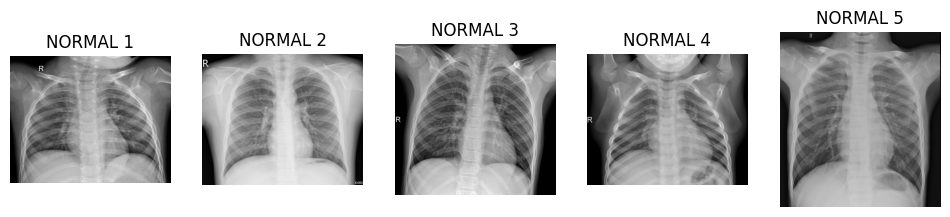

In [12]:
report_data.plot_samples(category_type=ClassDataType.NORMAL)

#### 2.4.2 - Imagens com Covid

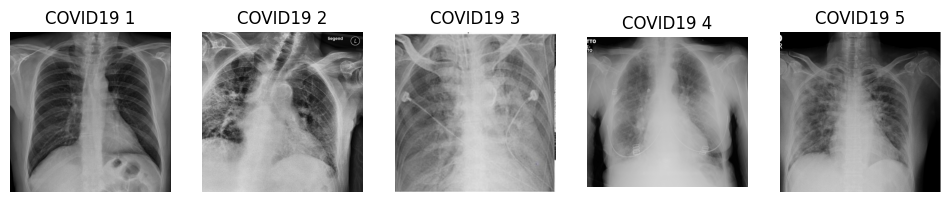

In [13]:
report_data.plot_samples(category_type=ClassDataType.COVID19)

#### 2.4.3 - Imagens com Pneumonia

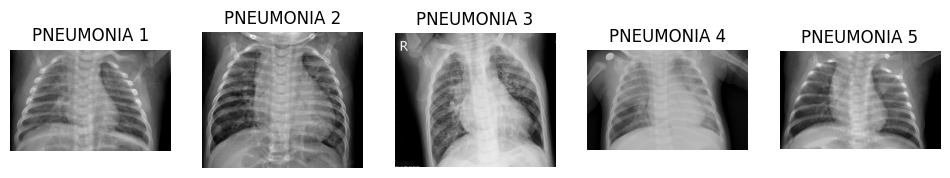

In [14]:
report_data.plot_samples(category_type=ClassDataType.PNEUMONIA)

### 2.5 - Criação dos Datasets e DataLoaders


1.  `data augmentation` no conjunto de treino;
2.  transformações de validação/teste;
3.  deivisao do conjunto de treino em subconjuntos de treino e validação;
4.  Agrupo tudo em `dataLoaders` para mandar as imagens para rede em `batches`.

In [15]:
data_handler = DataHandler(config_instance)

dataloaders = {
    "train": data_handler.train_loader,
    "val": data_handler.val_loader,
    "test": data_handler.test_loader
}

num_classes = len(data_handler.class_names)
class_names = data_handler.class_names

Datasets criados. Classes: ['COVID19', 'NORMAL', 'PNEUMONIA']
Tamanho do treino: 4115, Validacao: 1029, Teste: 1288
DataLoaders criados com sucesso.


### 2.5 - Verificação do Data Augmentation
Eu fiz a aplicação do `data augmentation` e agora o objetivo é garantir que nada de muito estranho tenha acontecido visto a natureza do que eu fiz, aqui é exibido um batch de imagens do `train_loader`.

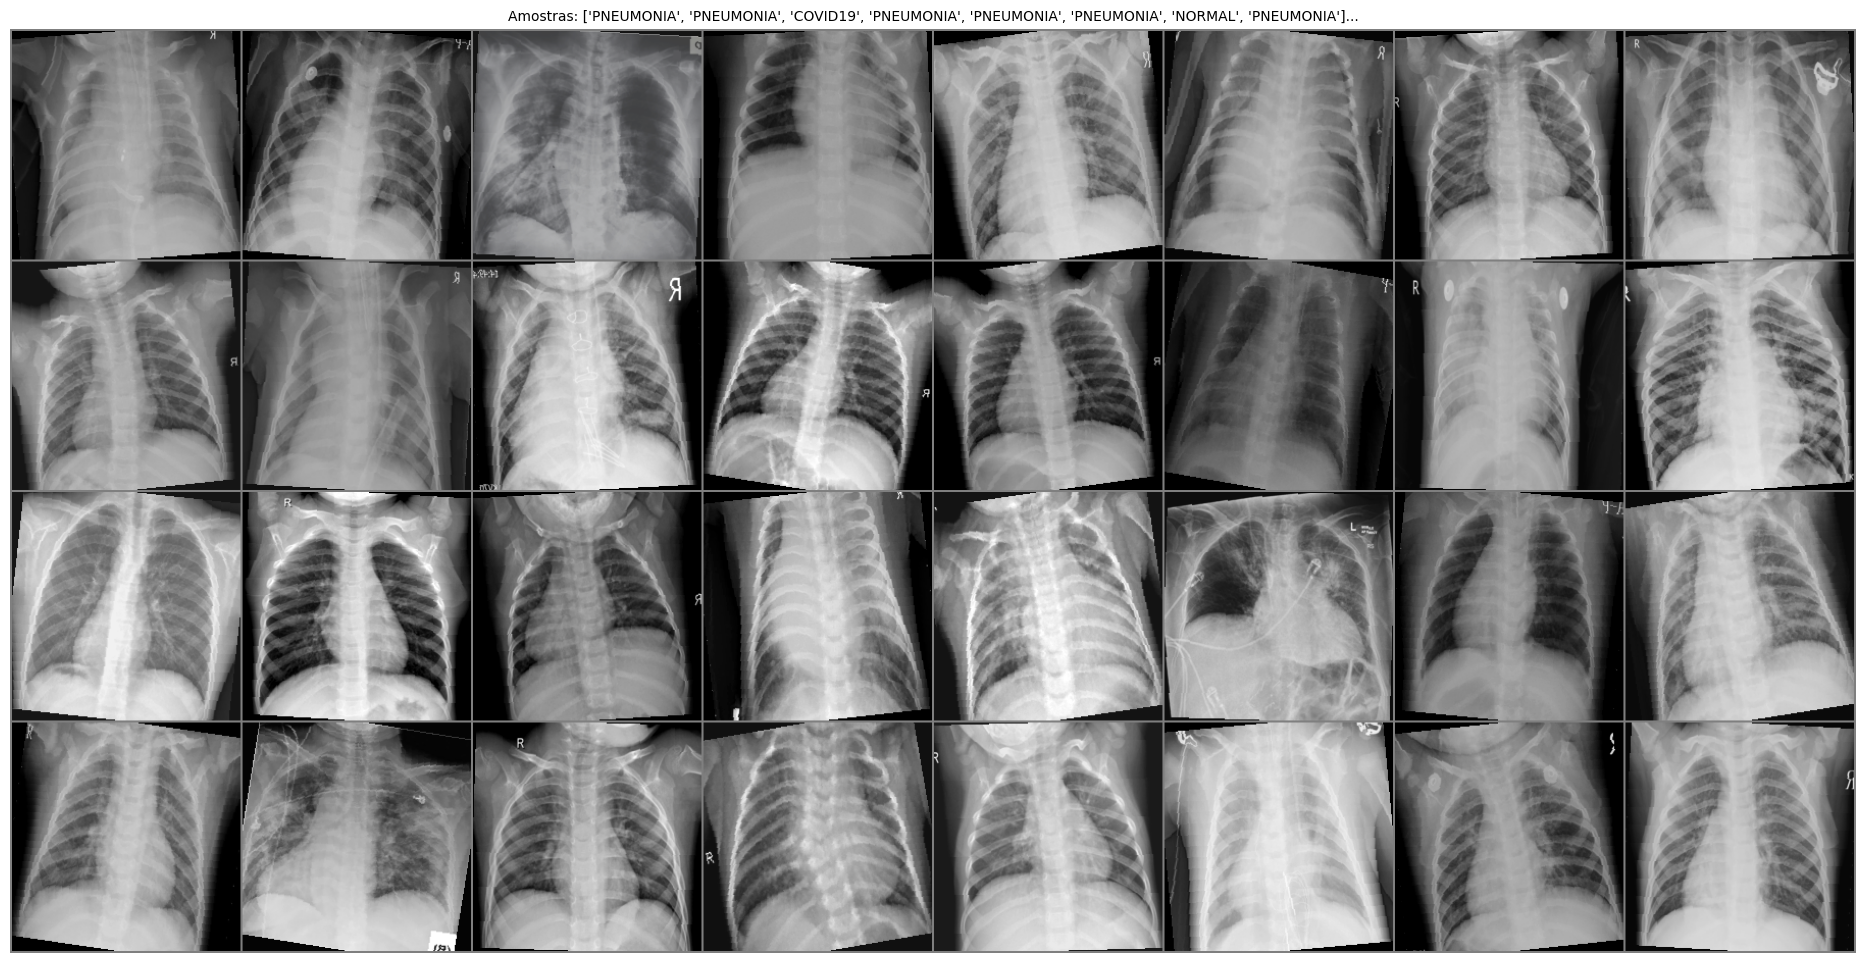

In [16]:
ReportData.print_normalized_images(class_names=class_names, data_loader=dataloaders['train'])

# 3. Modelo 1: Rede Convolucional Customizada

In [17]:
class Net(nn.Module):
    def __init__(self, num_classes=3):
        super().__init__()
        self.printed = False
        # in_channels de 3 foi pq transforma para rgb
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=128 * 14 * 14, out_features=128)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(in_features=128, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool3(x)

        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool4(x)

        if not self.printed:
            self.printed = True
            print("Shape do tensor antes do flatten:", x.shape)
            print("[batch_size, canais, altura, largura] - multiplicar tudo, exceto o batch_size")

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)

        return x

    def embedding(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = F.relu(x)

        return x

In [18]:
model_custom = Net(num_classes=num_classes)
model_custom.to(device)
model_custom = torch.compile(model_custom)

class_weights = config_instance.class_weights_train()
loss_fn = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.Adam(params=model_custom.parameters(), lr=config_instance.learning_rate)

experiment_name_custom = f"CustomCNN_{int(time.time())}"
writer_custom = SummaryWriter(log_dir=f"runs/{experiment_name_custom}")

print(f"Iniciando experimento: {experiment_name_custom}")
print(f"Logs do TensorBoard serão salvos em: runs/{experiment_name_custom}")

trainer_custom = Trainer(
    model=model_custom,
    dataloaders=dataloaders,
    loss_fn=loss_fn,
    optimizer=optimizer,
    config=config_instance,
    experiment_name=experiment_name_custom,
    writer=writer_custom
)

Covid: 460, Normal: 1266, Pneumonia: 3418
Iniciando experimento: CustomCNN_1753829945
Logs do TensorBoard serão salvos em: runs/CustomCNN_1753829945


### Treinamento do Modelo Customizado
Treinando modelo customizado com early stopping


In [19]:
torch.set_float32_matmul_precision('high') # TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.


trainer_custom.train()


Shape do tensor antes do flatten: torch.Size([64, 128, 14, 14])
[batch_size, canais, altura, largura] - multiplicar tudo, exceto o batch_size
Epoch 1 | train loss: 0.5265 | train acc: 0.7674 | val loss: 0.5177 | val acc: 0.7094 | best val acc: 0.0000 | early stopping: 0
Epoch 2 | train loss: 0.3402 | train acc: 0.8539 | val loss: 0.2641 | val acc: 0.9009 | best val acc: 0.7094 | early stopping: 0
Epoch 3 | train loss: 0.2477 | train acc: 0.8965 | val loss: 0.2957 | val acc: 0.8115 | best val acc: 0.9009 | early stopping: 0
Epoch 4 | train loss: 0.2408 | train acc: 0.8897 | val loss: 0.2006 | val acc: 0.9155 | best val acc: 0.9009 | early stopping: 1
Epoch 5 | train loss: 0.1945 | train acc: 0.9089 | val loss: 0.1855 | val acc: 0.9145 | best val acc: 0.9155 | early stopping: 0
Epoch 6 | train loss: 0.1903 | train acc: 0.9130 | val loss: 0.1933 | val acc: 0.9329 | best val acc: 0.9155 | early stopping: 1
Epoch 7 | train loss: 0.1554 | train acc: 0.9300 | val loss: 0.1650 | val acc: 0.933

### Avaliação do Modelo 1
- Avaliar a performance do modelo
- Identificar sinais de *overfitting* ou *underfitting*
- Calcular as métricas de performance no conjunto de teste para ver como o modelo generaliza para dados nunca antes vistos.

In [20]:
model_custom.load_state_dict(torch.load(trainer_custom.model_save_path, weights_only=True))

print(f"Melhor modelo '{trainer_custom.model_save_path}' carregado para avaliação.")

Melhor modelo 'models/CustomCNN_1753829945.pth' carregado para avaliação.


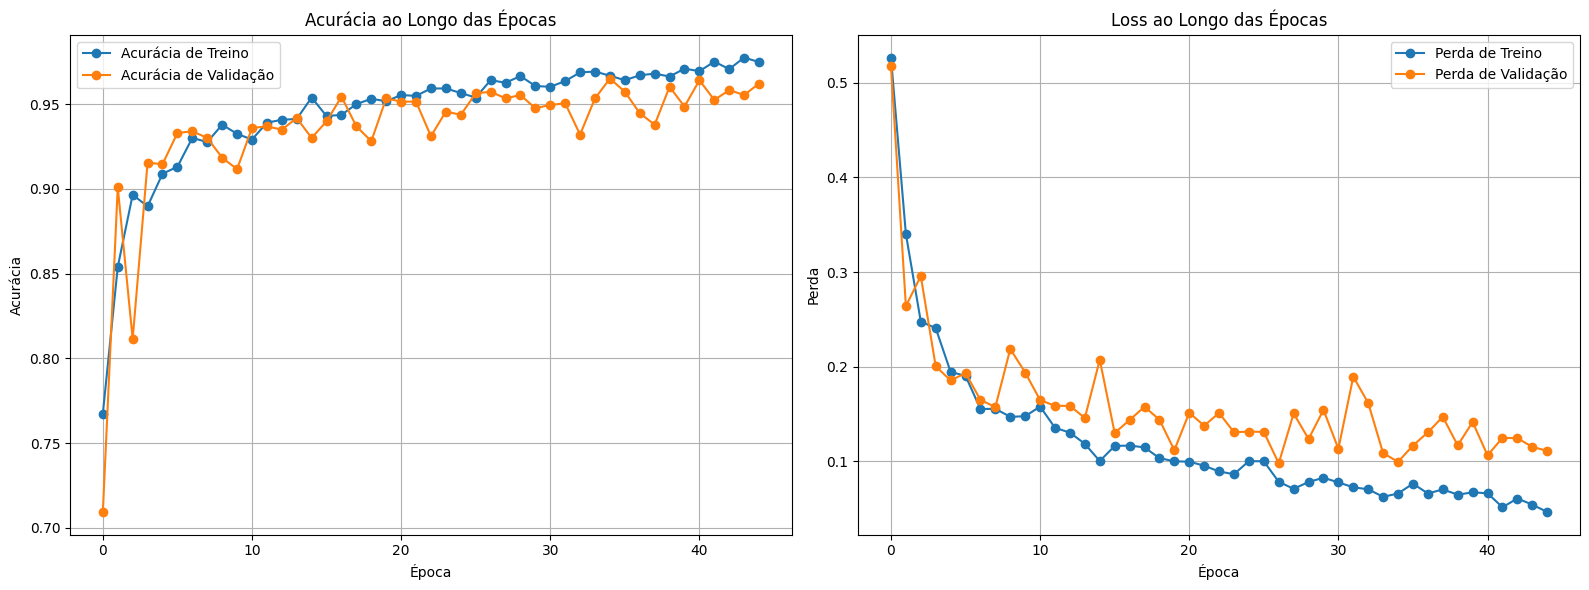

In [21]:
ReportData.print_history_data(history=trainer_custom.history)

In [22]:
history_old = np.array(trainer_custom.history)

print(f"Acurácia de Treino: {history_old[:, 1]}")
print(f"Acurácia de Validação: {history_old[:, 3]}")
print(f"Perda de Treino: {history_old[:, 0]}")
print(f"Perda de Validação: {history_old[:, 2]}")

Acurácia de Treino: [0.76743621 0.85394897 0.89647631 0.88967193 0.90886999 0.91300122
 0.93001215 0.92758202 0.93778858 0.93244228 0.9290401  0.93900365
 0.94070474 0.94119077 0.95382746 0.94289186 0.9436209  0.94993925
 0.95309842 0.95164034 0.95528554 0.95479951 0.95917375 0.95917375
 0.95650061 0.95382746 0.96403402 0.96257594 0.96646416 0.96063183
 0.96014581 0.963548   0.96865128 0.9691373  0.96670717 0.96403402
 0.96695018 0.96792224 0.96622114 0.9708384  0.96938032 0.97496962
 0.97059538 0.97739976 0.97472661]
Acurácia de Validação: [0.70942663 0.90087464 0.81146744 0.9154519  0.91448008 0.93294461
 0.93391642 0.93002915 0.91836735 0.91156463 0.93586006 0.93683188
 0.93488824 0.94169096 0.93002915 0.93974733 0.95432459 0.93683188
 0.92808552 0.95335277 0.95140914 0.95140914 0.93100097 0.94557823
 0.9436346  0.95626822 0.95724004 0.95335277 0.9552964  0.94752187
 0.9494655  0.95043732 0.93197279 0.95335277 0.96501458 0.95724004
 0.94460641 0.93780369 0.96015549 0.94849368 0.9640

In [23]:
true_test_custom, pred_test_custom, test_loss_custom = Trainer.eval_step(
    model_eval=model_custom,
    device_eval=device,
    loss_fn_eval=loss_fn,
    dataloader=dataloaders['test']
)

test_acc_custom = accuracy_score(true_test_custom, pred_test_custom)
print(f"Acurácia Final do Modelo Customizado no Teste: {test_acc_custom:.4f}")
print(f"Loss Final do Modelo Customizado no Teste: {test_loss_custom:.4f}")

Acurácia Final do Modelo Customizado no Teste: 0.9534
Loss Final do Modelo Customizado no Teste: 0.1598


### Relatório de Classificação e Matriz de Confusão


--- Relatório de Classificação ---
              precision    recall  f1-score   support

     COVID19       0.99      0.98      0.99       116
      NORMAL       0.86      0.97      0.91       317
   PNEUMONIA       0.99      0.94      0.96       855

    accuracy                           0.95      1288
   macro avg       0.95      0.97      0.96      1288
weighted avg       0.96      0.95      0.95      1288



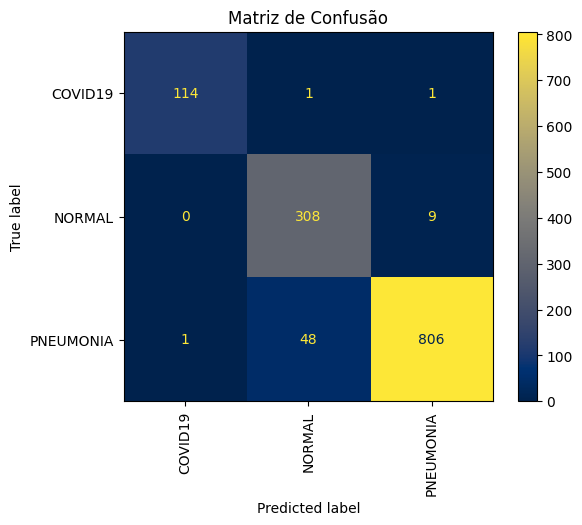

In [24]:
print("--- Relatório de Classificação ---")
print(classification_report(true_test_custom, pred_test_custom, target_names=class_names))

ReportData.confusion_matrix(class_names=class_names, true=true_test_custom, pred=pred_test_custom)

### Análise Visual das Predições
Esta visualização nos permite inspecionar exemplos específicos do conjunto de teste, comparando o rótulo verdadeiro com a predição do modelo.

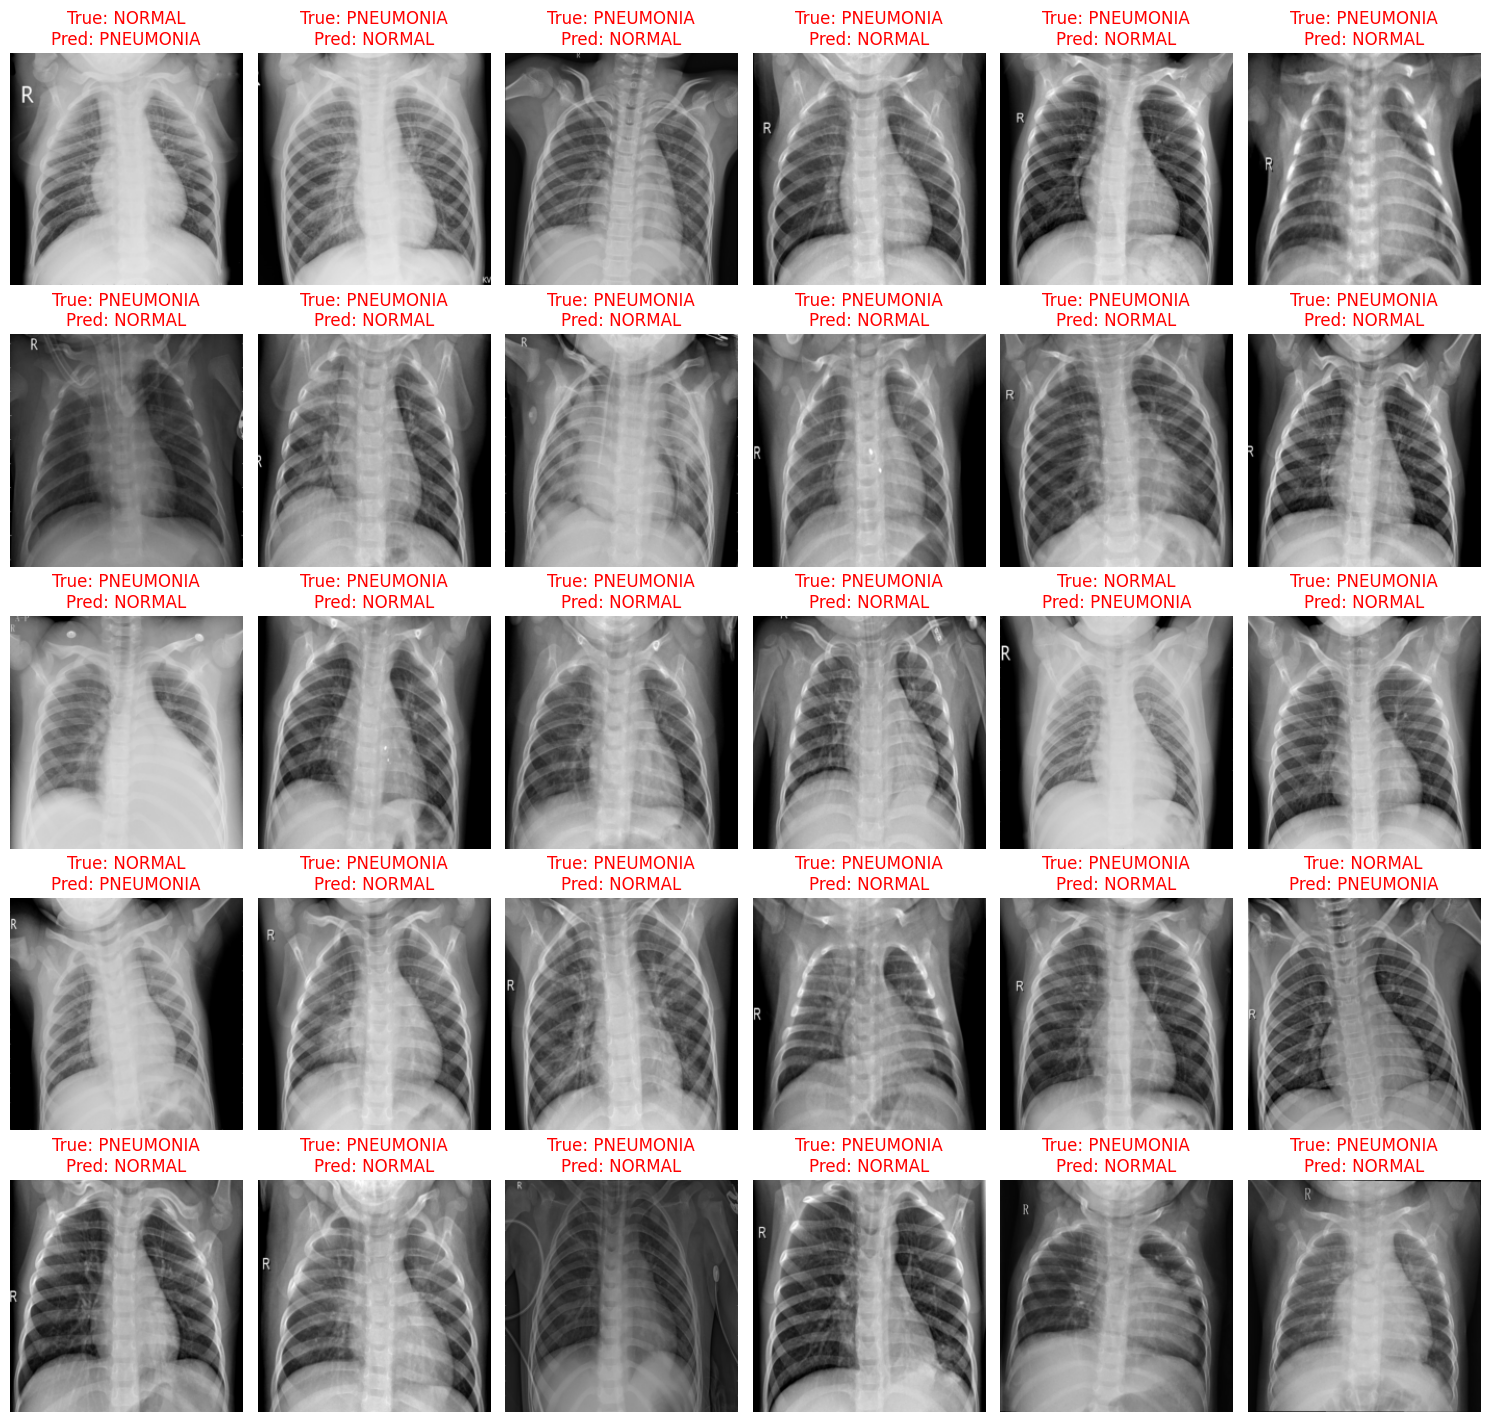

In [25]:
vis_loader = torch.utils.data.DataLoader(data_handler.test_dataset, batch_size=25, shuffle=True)

ReportData.compare_mismatched_batch(
    class_names=class_names,
    data_loader=vis_loader,
    model=model_custom,
    device=device
)


### Análise e Discussão dos Resultados (Modelo 1)

**Análise dos Gráficos de Aprendizado:**

Olhando os gráficos, dá pra ver que o modelo começou a sofrer **overfitting**. A acurácia de treino foi subindo até chegar perto de 98%, mas a de validação "travou" nos 95% e não melhorou mais. O sinal mais claro disso foi a curva de perda: a de treino caiu quase a zero, mas a de validação, depois de cair bastante, voltou a subir um pouquinho. Isso mostra que o modelo estava começando a decorar as imagens de treino, em vez de aprender a generalizar. O *early stopping* ajudou a salvar o modelo antes que isso piorasse muito.

Um dos sinais mais comuns de overfitting é quando:

- A **loss do treino continua diminuindo** ao longo das épocas.
- A **loss de validação começa a aumentar** após certo ponto.

**Análise das Métricas de Teste:**

O resultado de **95% de acurácia** no teste foi bom! A rede se saiu super bem para identificar **PNEUMONIA** (F1-score de 0.97), e teve mais de dificuldade com os casos **NORMAIS** (F1-score de 0.91), principalmente porque às vezes classificava um doente como normal.

Com o **recall de 96% para PNEUMONIA**. parece que nossa rede é boa de dizer que é doença quando ela existe.

**Análise Qualitativa das Falhas:**

Maior parte dos erros acontece entre as classes **PNEUMONIA** e **NORMAL**. O erro mais comum foi o modelo olhar para um raio-x com pneumonia e dizer que era normal (aconteceu 48 vezes). Essa confusão é a principal razão pela qual a precisão da classe NORMAL foi mais baixa.



# 4. Modelo 2: Rede Pré-treinada congelada


1.  Carregamos um modelo pré-treinado com seus pesos da ImageNet.
2.  **Congelamos os pesos** de todas as camadas convolucionais.
3.  Substituímos a camada de classificação final por uma nova, compatível com o nosso problema de 3 classes.
4.  Treinamos **apenas** os pesos desta nova camada de classificação.

In [26]:
def get_pretrained_model(num_classes: int = 3, feature_extract: bool = False):

    model = models.densenet121(weights='IMAGENET1K_V1')

    if feature_extract:
        for param in model.parameters():
            param.requires_grad = False

    num_ftrs = model.classifier.in_features
    model.classifier = nn.Linear(num_ftrs, num_classes)

    return model

### Modelo Congelado
Vou usar a `densenet121`. A função `get_pretrained_model` irá carregar o modelo, congelar as camadas e substituir o classificador final.

In [27]:
config_instance = Config(learning_rate=1e-4, patience=20)

model_frozen = get_pretrained_model(
    num_classes=num_classes,
    feature_extract=True
)

model_frozen.to(device)
model_frozen = torch.compile(model_frozen)

In [28]:
params_to_update_frozen = filter(lambda p: p.requires_grad, model_frozen.parameters())
optimizer_frozen = torch.optim.Adam(params_to_update_frozen, lr=config_instance.learning_rate)

experiment_name_frozen = f"DenseNet_Frozen_{int(time.time())}"
writer_frozen = SummaryWriter(log_dir=f"runs/{experiment_name_frozen}")
print(f"Iniciando experimento: {experiment_name_frozen}")

trainer_frozen = Trainer(
    model=model_frozen,
    dataloaders=dataloaders,
    loss_fn=loss_fn,
    optimizer=optimizer_frozen,
    config=config_instance,
    experiment_name=experiment_name_frozen,
    writer=writer_frozen
)

Iniciando experimento: DenseNet_Frozen_1753830512


### Treinamento do Modelo Congelado


In [29]:
trainer_frozen.train()

Epoch 1 | train loss: 1.1242 | train acc: 0.4056 | val loss: 1.0178 | val acc: 0.5569 | best val acc: 0.0000 | early stopping: 0
Epoch 2 | train loss: 0.9345 | train acc: 0.5745 | val loss: 0.8817 | val acc: 0.6190 | best val acc: 0.5569 | early stopping: 0
Epoch 3 | train loss: 0.8007 | train acc: 0.7149 | val loss: 0.7467 | val acc: 0.7590 | best val acc: 0.6190 | early stopping: 0
Epoch 4 | train loss: 0.6983 | train acc: 0.7786 | val loss: 0.6700 | val acc: 0.7668 | best val acc: 0.7590 | early stopping: 0
Epoch 5 | train loss: 0.6260 | train acc: 0.8061 | val loss: 0.6070 | val acc: 0.8328 | best val acc: 0.7668 | early stopping: 0
Epoch 6 | train loss: 0.5715 | train acc: 0.8226 | val loss: 0.5369 | val acc: 0.8669 | best val acc: 0.8328 | early stopping: 0
Epoch 7 | train loss: 0.5177 | train acc: 0.8539 | val loss: 0.5153 | val acc: 0.8552 | best val acc: 0.8669 | early stopping: 0
Epoch 8 | train loss: 0.4869 | train acc: 0.8561 | val loss: 0.4583 | val acc: 0.8659 | best val 

### Avaliação do Modelo 2 (Congelado)
- Avaliar a performance do modelo
- Identificar sinais de *overfitting* ou *underfitting*
- Calcular as métricas de performance no conjunto de teste para ver como o modelo generaliza para dados nunca antes vistos.

In [30]:
model_frozen.load_state_dict(torch.load(trainer_frozen.model_save_path))
print(f"Melhor modelo '{trainer_frozen.model_save_path}' carregado para avaliação.")

Melhor modelo 'models/DenseNet_Frozen_1753830512.pth' carregado para avaliação.


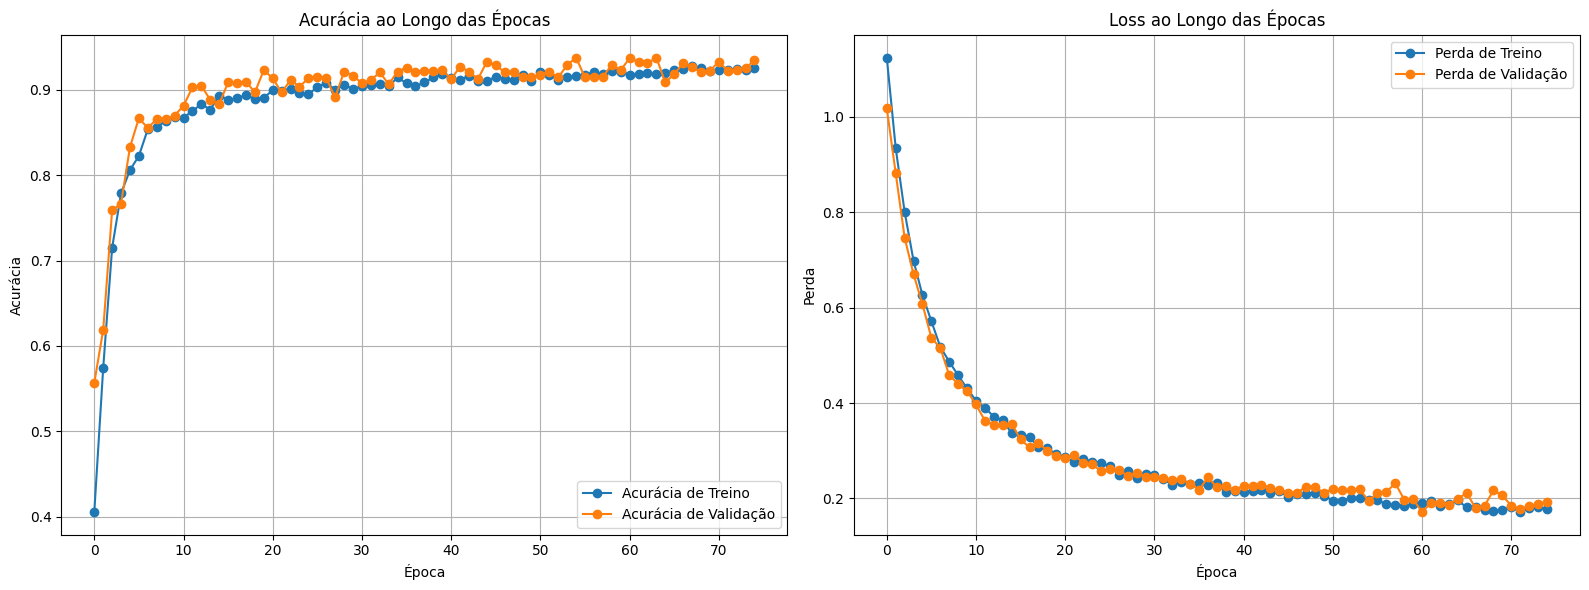

In [31]:
ReportData.print_history_data(history=trainer_frozen.history)

In [32]:
history_old_frozen = np.array(trainer_frozen.history)

print(f"Acurácia de Treino: {history_old_frozen[:, 1]}")
print(f"Acurácia de Validação: {history_old_frozen[:, 3]}")
print(f"Perda de Treino: {history_old_frozen[:, 0]}")
print(f"Perda de Validação: {history_old_frozen[:, 2]}")

Acurácia de Treino: [0.40558931 0.5744836  0.71494532 0.77861482 0.80607533 0.82260024
 0.85394897 0.85613609 0.8636695  0.86804374 0.86755772 0.87509113
 0.88335358 0.87679222 0.89307412 0.88821385 0.89015796 0.89380316
 0.88918591 0.89064399 0.89963548 0.89914945 0.90109356 0.89647631
 0.89501823 0.90303767 0.90838396 0.90012151 0.90619684 0.90085055
 0.90400972 0.90619684 0.90716889 0.90425273 0.9144593  0.90765492
 0.90400972 0.90862697 0.9144593  0.9181045  0.91397327 0.91154313
 0.91664642 0.91057108 0.91032807 0.91518834 0.91324423 0.91130012
 0.91737546 0.91032807 0.92053463 0.91737546 0.91154313 0.91494532
 0.9164034  0.91786148 0.92077764 0.91859052 0.92223572 0.92126367
 0.91786148 0.91834751 0.91956258 0.9181045  0.91980559 0.92272175
 0.92393682 0.92758202 0.92612394 0.9217497  0.92296476 0.9236938
 0.92417983 0.92320778 0.9253949 ]
Acurácia de Validação: [0.55685131 0.61904762 0.75898931 0.76676385 0.83284742 0.86686103
 0.85519922 0.86588921 0.86588921 0.86977648 0.88143

### Métricas de Performance no Teste (Modelo Congelado)
Calculamos as métricas detalhadas no conjunto de teste para avaliar a capacidade de generalização do modelo congelado.

In [45]:
true_test_frozen, pred_test_frozen, test_loss_frozen = Trainer.eval_step(
    model_eval=model_frozen,
    device_eval=device,
    loss_fn_eval=loss_fn,
    dataloader=dataloaders['test']
)


Acurácia Final do Modelo congelado no Teste: 0.9092
Loss Final do Modelo congelado no Teste: 0.2425
--- Relatório de Classificação ---
              precision    recall  f1-score   support

     COVID19       0.97      0.95      0.96       116
      NORMAL       0.76      0.95      0.84       317
   PNEUMONIA       0.98      0.89      0.93       855

    accuracy                           0.91      1288
   macro avg       0.90      0.93      0.91      1288
weighted avg       0.92      0.91      0.91      1288



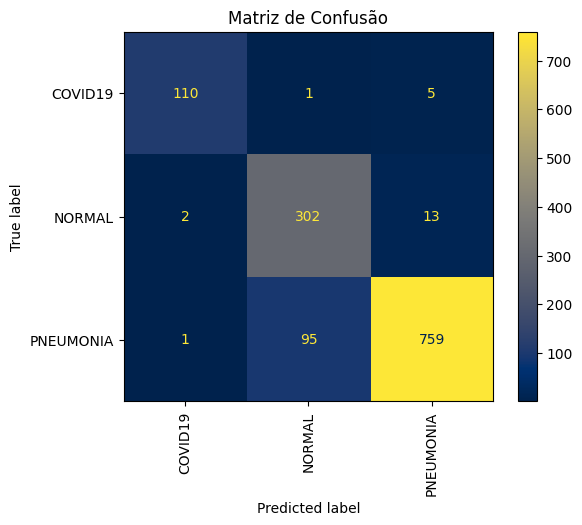

In [47]:

test_acc_frozen = accuracy_score(true_test_frozen, pred_test_frozen)
print(f"Acurácia Final do Modelo congelado no Teste: {test_acc_frozen:.4f}")
print(f"Loss Final do Modelo congelado no Teste: {test_loss_frozen:.4f}")

print("--- Relatório de Classificação ---")
print(classification_report(true_test_frozen, pred_test_frozen, target_names=class_names))

ReportData.confusion_matrix(class_names=class_names, true=true_test_frozen, pred=pred_test_frozen)

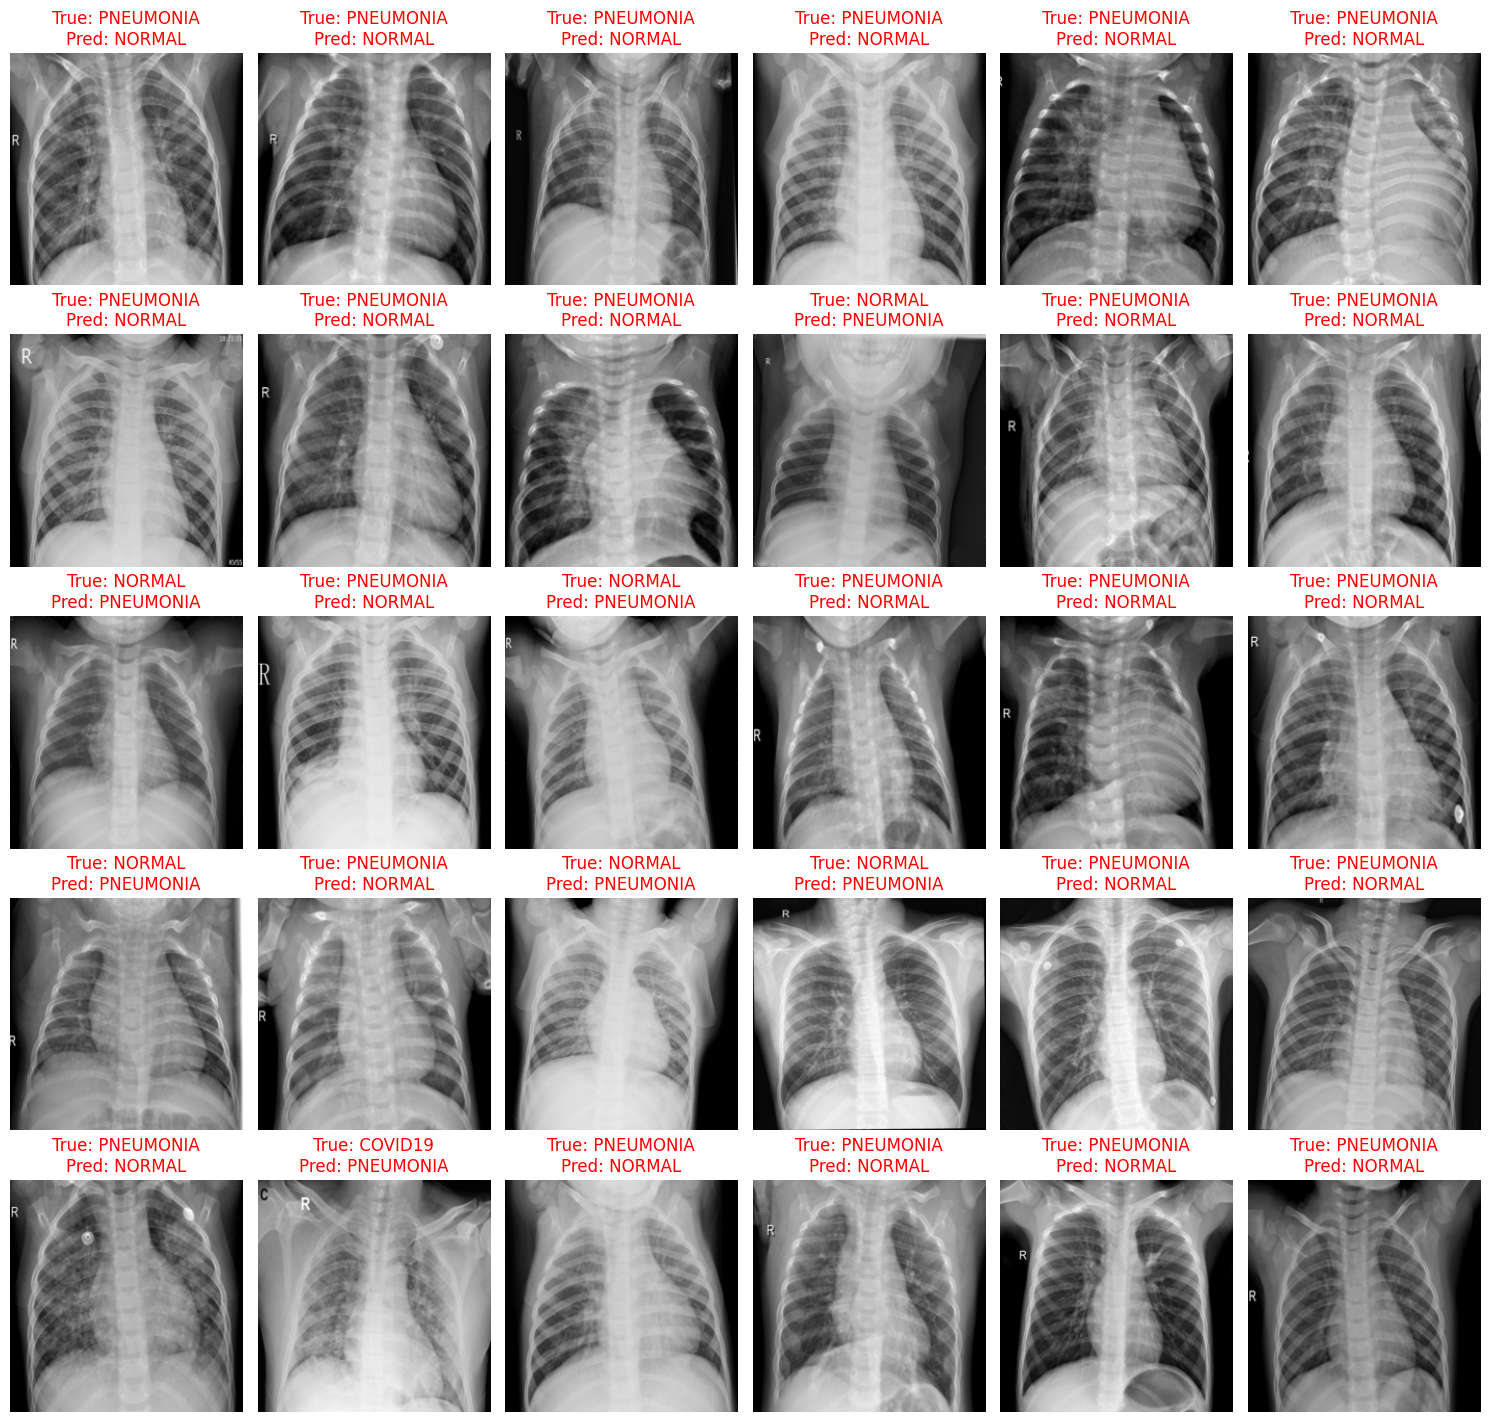

In [34]:
ReportData.compare_mismatched_batch(
    class_names=class_names,
    data_loader=vis_loader,
    model=model_frozen,
    device=device
)


### Análise e Discussão dos Resultados (Modelo 2 - Congelado)

**Análise dos Gráficos de Aprendizado:**

Nao parece ter acontecido **overfitting**. As curvas de acurácia de treino e validação andaram proximas, terminando perto uma da outra (em torno de 92-93%). O mesmo aconteceu com a perda, que caiu de forma parecida para as duas.

Acho que o fato de congelar a rede toda (exceto a última camada) faça com que dificulte gravar os detalhes que criam o overfitting

**Análise das Métricas de Teste:**

O resultado final no teste foi de **90% de acurácia**, mais baixo que os 95% do modelo customizado. O desempenho caiu de forma geral, sendo a classe **NORMAL** que mais sofreu, que ficou com um F1-score de apenas 0.84.

Olhando para a classe NORMAL:
- O **recall foi de 95%**: O modelo disse quase todos os casos que eram realmente normais.
- A **precisão foi de 76%**: Quando o modelo chutava "NORMAL", ele errava bastante, confundindo casos de doença com casos saudáveis.

**Análise Qualitativa das Falhas:**

A matriz de confusão mostra que o modelo classificou **95 casos de PNEUMONIA como se fossem NORMAIS**. Esse número é quase o dobro dos 48 erros do modelo anterior.


# 5. Modelo 3: Rede Pré-treinada (Fine-Tuning)


1.  Carregamos o modelo pré-treinado.
2.  **Descongelamos todos os pesos**.
4.  Treina a rede toda

In [35]:
config_instance = Config(learning_rate=1e-5, patience=10)

model_fine_tuning = get_pretrained_model(
    num_classes=num_classes,
    feature_extract=False
)

model_fine_tuning.to(device)
model_fine_tuning = torch.compile(model_fine_tuning)

In [36]:
optimizer_fine_tuning = torch.optim.Adam(model_fine_tuning.parameters(), lr=config_instance.learning_rate)

experiment_name_fine_tuning = f"DenseNet_FineTuning_{int(time.time())}"
writer_fine_tuning = SummaryWriter(log_dir=f"runs/{experiment_name_fine_tuning}")
print(f"Iniciando experimento: {experiment_name_fine_tuning}")

trainer_fine_tuning = Trainer(
    model=model_fine_tuning,
    dataloaders=dataloaders,
    loss_fn=loss_fn,
    optimizer=optimizer_fine_tuning,
    config=config_instance,
    experiment_name=experiment_name_fine_tuning,
    writer=writer_fine_tuning
)

Iniciando experimento: DenseNet_FineTuning_1753831506


### Treinamento do Modelo de Fine-Tuning

In [37]:
trainer_fine_tuning.train()

Epoch 1 | train loss: 0.8025 | train acc: 0.3587 | val loss: 0.6018 | val acc: 0.5656 | best val acc: 0.0000 | early stopping: 0
Epoch 2 | train loss: 0.4236 | train acc: 0.7640 | val loss: 0.3635 | val acc: 0.8805 | best val acc: 0.5656 | early stopping: 0
Epoch 3 | train loss: 0.2714 | train acc: 0.8931 | val loss: 0.2554 | val acc: 0.9271 | best val acc: 0.8805 | early stopping: 0
Epoch 4 | train loss: 0.1940 | train acc: 0.9329 | val loss: 0.1852 | val acc: 0.9446 | best val acc: 0.9271 | early stopping: 0
Epoch 5 | train loss: 0.1548 | train acc: 0.9439 | val loss: 0.1556 | val acc: 0.9572 | best val acc: 0.9446 | early stopping: 0
Epoch 6 | train loss: 0.1311 | train acc: 0.9543 | val loss: 0.1529 | val acc: 0.9514 | best val acc: 0.9572 | early stopping: 0
Epoch 7 | train loss: 0.1217 | train acc: 0.9563 | val loss: 0.1392 | val acc: 0.9543 | best val acc: 0.9572 | early stopping: 1
Epoch 8 | train loss: 0.1002 | train acc: 0.9643 | val loss: 0.1129 | val acc: 0.9640 | best val 

### Avaliação do Modelo 3 (Fine-Tuning)
Vamos avaliar nosso modelo mais complexo e ver se o ajuste fino de toda a rede trouxe os melhores resultados.

In [38]:
model_fine_tuning.load_state_dict(torch.load(trainer_fine_tuning.model_save_path, weights_only=True))
print(f"Melhor modelo '{trainer_fine_tuning.model_save_path}' carregado para avaliação.")

Melhor modelo 'models/DenseNet_FineTuning_1753831506.pth' carregado para avaliação.


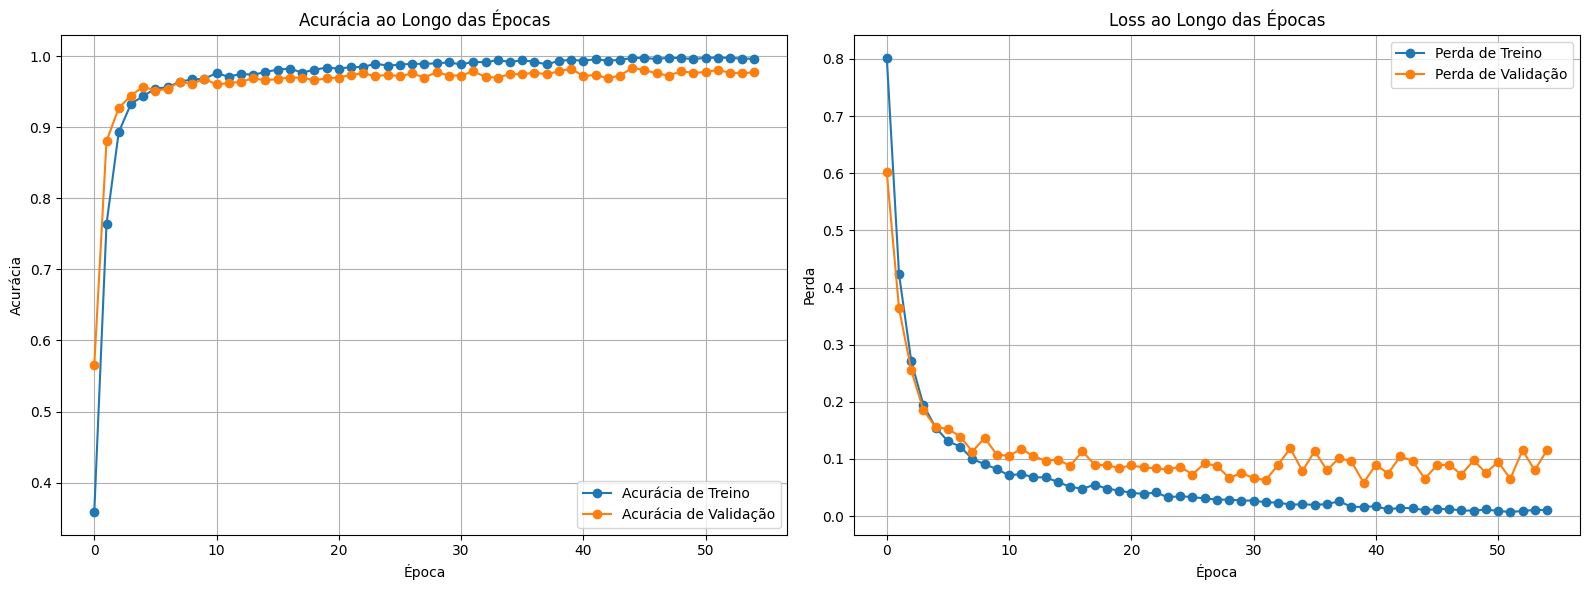

In [39]:
ReportData.print_history_data(history=trainer_fine_tuning.history)

In [40]:
history_old_tuning = np.array(trainer_fine_tuning.history)

print(f"Acurácia de Treino: {history_old_tuning[:, 1]}")
print(f"Acurácia de Validação: {history_old_tuning[:, 3]}")
print(f"Perda de Treino: {history_old_tuning[:, 0]}")
print(f"Perda de Validação: {history_old_tuning[:, 2]}")

Acurácia de Treino: [0.35868773 0.76403402 0.89307412 0.93292831 0.94386391 0.95431349
 0.95625759 0.96427704 0.9671932  0.96816525 0.97618469 0.97108141
 0.97521264 0.97375456 0.97788578 0.98104496 0.98250304 0.97691373
 0.98080194 0.98396112 0.98250304 0.98469016 0.98469016 0.98955043
 0.98663426 0.98809235 0.98930741 0.9890644  0.99003645 0.99125152
 0.98833536 0.99198056 0.99149453 0.99441069 0.99198056 0.99416768
 0.99222357 0.98833536 0.99343864 0.99465371 0.99368165 0.99562576
 0.99368165 0.99465371 0.99756987 0.99732685 0.99611179 0.99781288
 0.99708384 0.99611179 0.99756987 0.99805589 0.99756987 0.99659781
 0.9963548 ]
Acurácia de Validação: [0.56559767 0.88046647 0.9271137  0.94460641 0.95724004 0.95140914
 0.95432459 0.96404276 0.96112731 0.96793003 0.96015549 0.96209913
 0.96404276 0.96890185 0.96598639 0.96793003 0.96987366 0.96987366
 0.96598639 0.96890185 0.96987366 0.97376093 0.97570457 0.9718173
 0.97376093 0.9718173  0.97570457 0.96987366 0.9776482  0.97278912
 0.9727

### Métricas de Performance no Teste (Fine-Tuning)
Calculamos as métricas finais para o modelo de fine-tuning para comparar com as abordagens anteriores.

In [ ]:
true_test_fine, pred_test_fine, test_loss_fine = Trainer.eval_step(
    model_eval=model_fine_tuning,
    device_eval=device,
    loss_fn_eval=loss_fn,
    dataloader=dataloaders['test']
)


Acurácia Final do Modelo finetuning no Teste: 0.9736
Loss Final do Modelo finetuning no Teste: 0.0806
--- Relatório de Classificação ---
              precision    recall  f1-score   support

     COVID19       1.00      0.98      0.99       116
      NORMAL       0.95      0.95      0.95       317
   PNEUMONIA       0.98      0.98      0.98       855

    accuracy                           0.97      1288
   macro avg       0.98      0.97      0.97      1288
weighted avg       0.97      0.97      0.97      1288



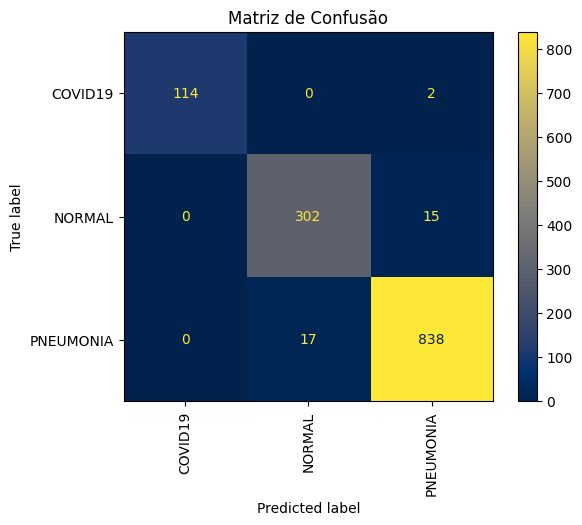

In [43]:

test_acc_fine = accuracy_score(true_test_fine, pred_test_fine)
print(f"Acurácia Final do Modelo finetuning no Teste: {test_acc_fine:.4f}")
print(f"Loss Final do Modelo finetuning no Teste: {test_loss_fine:.4f}")

print("--- Relatório de Classificação ---")
print(classification_report(true_test_fine, pred_test_fine, target_names=class_names))

ReportData.confusion_matrix(class_names=class_names, true=true_test_fine, pred=pred_test_fine)

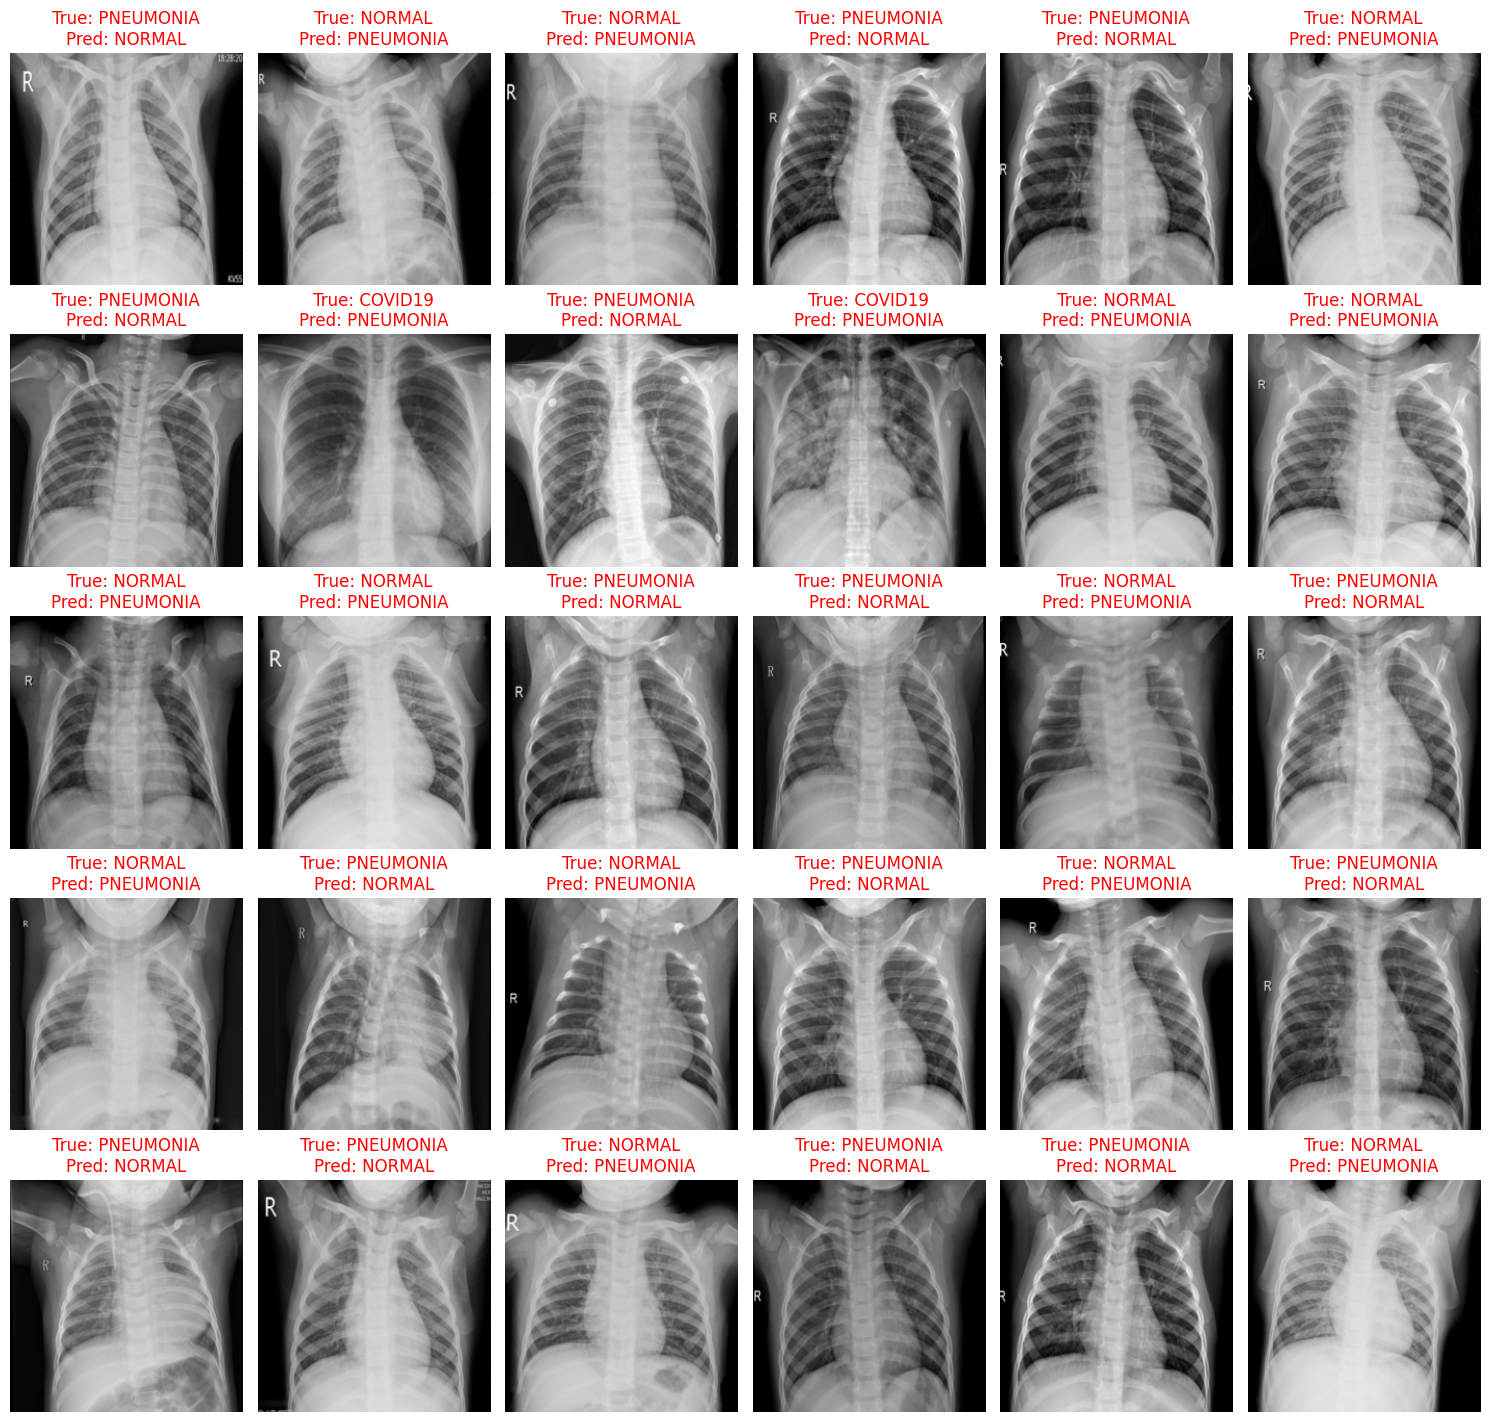

In [42]:
ReportData.compare_mismatched_batch(
    class_names=class_names,
    data_loader=vis_loader,
    model=model_fine_tuning,
    device=device
)

### Análise e Discussão dos Resultados (Modelo 3 - Fine-Tuning)

**Análise dos Gráficos de Aprendizado:**

A acurácia de treino subiu a bastante qse 99%, o que mostra que a rede aprendeu os dados de treino muito bem. Parece acontecer um pouco **overfitting** pq a acurácia de treino se distancia da de validação. Entretanto a **acurácia de validação** também subiu muito e se manteve estável qse **97%**.

**Análise das Métricas de Teste:**

Esse é o **melhor modelo de todos**. **Acurácia geral de 97%**, ele supera tanto o modelo customizado (95%) quanto o congelado (90%). Todas as classes tiveram um desempenho melhor.

Olhando para a classe que deu mais problema até aqui a **NORMAL** ela alcançou um F1-score de 0.95, com precisão e recall bem equilibrados.

**Análise Qualitativa das Falhas:**

Número de casos de **PNEUMONIA classificados erradamente como NORMAL caiu para apenas 17**.

Isso é uma melhora gigante em comparação com os 95 erros do modelo congelado e também melhor que os 48 erros do nosso primeiro modelo.

# 6. Análise Final e Comparação dos Modelos



1. A CNN Customizada teve um resultado ~97% de acurácia. Parece ter tido pouco de overfitting.
2. O Modelo Congelado teve um resultado ~90% de acurácia e foi o pior de todos. Parece nao ter tido overfitting, mas ele sofreu para diferenciar os casos de PNEUMONIA e NORMAL.
3. O Fine-Tuning foi o com melhor resultado ~98% de acurácia.


| Modelo                    | Acurácia (Teste) | Recall (Ponderado) | F1-Score (Ponderado) |
|---------------------------|------------------|--------------------|----------------------|
| 1. CNN Customizada        | 0.9534           | 0.9534             | 0.9542               |
| 2. DenseNet (Congelado)   | 0.9092           | 0.9092             | 0.9119               |
| 3. DenseNet (Fine-Tuning) | 0.9736           | 0.9736             | 0.9736               |